<a href="https://colab.research.google.com/github/BakloutiMolka/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Baklouti Molka

## Project Overview

## Load and Inspect Data

## Clean Data

###Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
fpath ="/content/drive/MyDrive/coding dojo/01 fundamentals/week 02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Data cleaning

In [7]:
df.shape

(8523, 12)

we got 12 columns in this data (5 columns are numerical and 7 string columns)
we also got 8523 rows

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

we got 1463 missing values in Item_Weight and 2410 in Outlet_Size

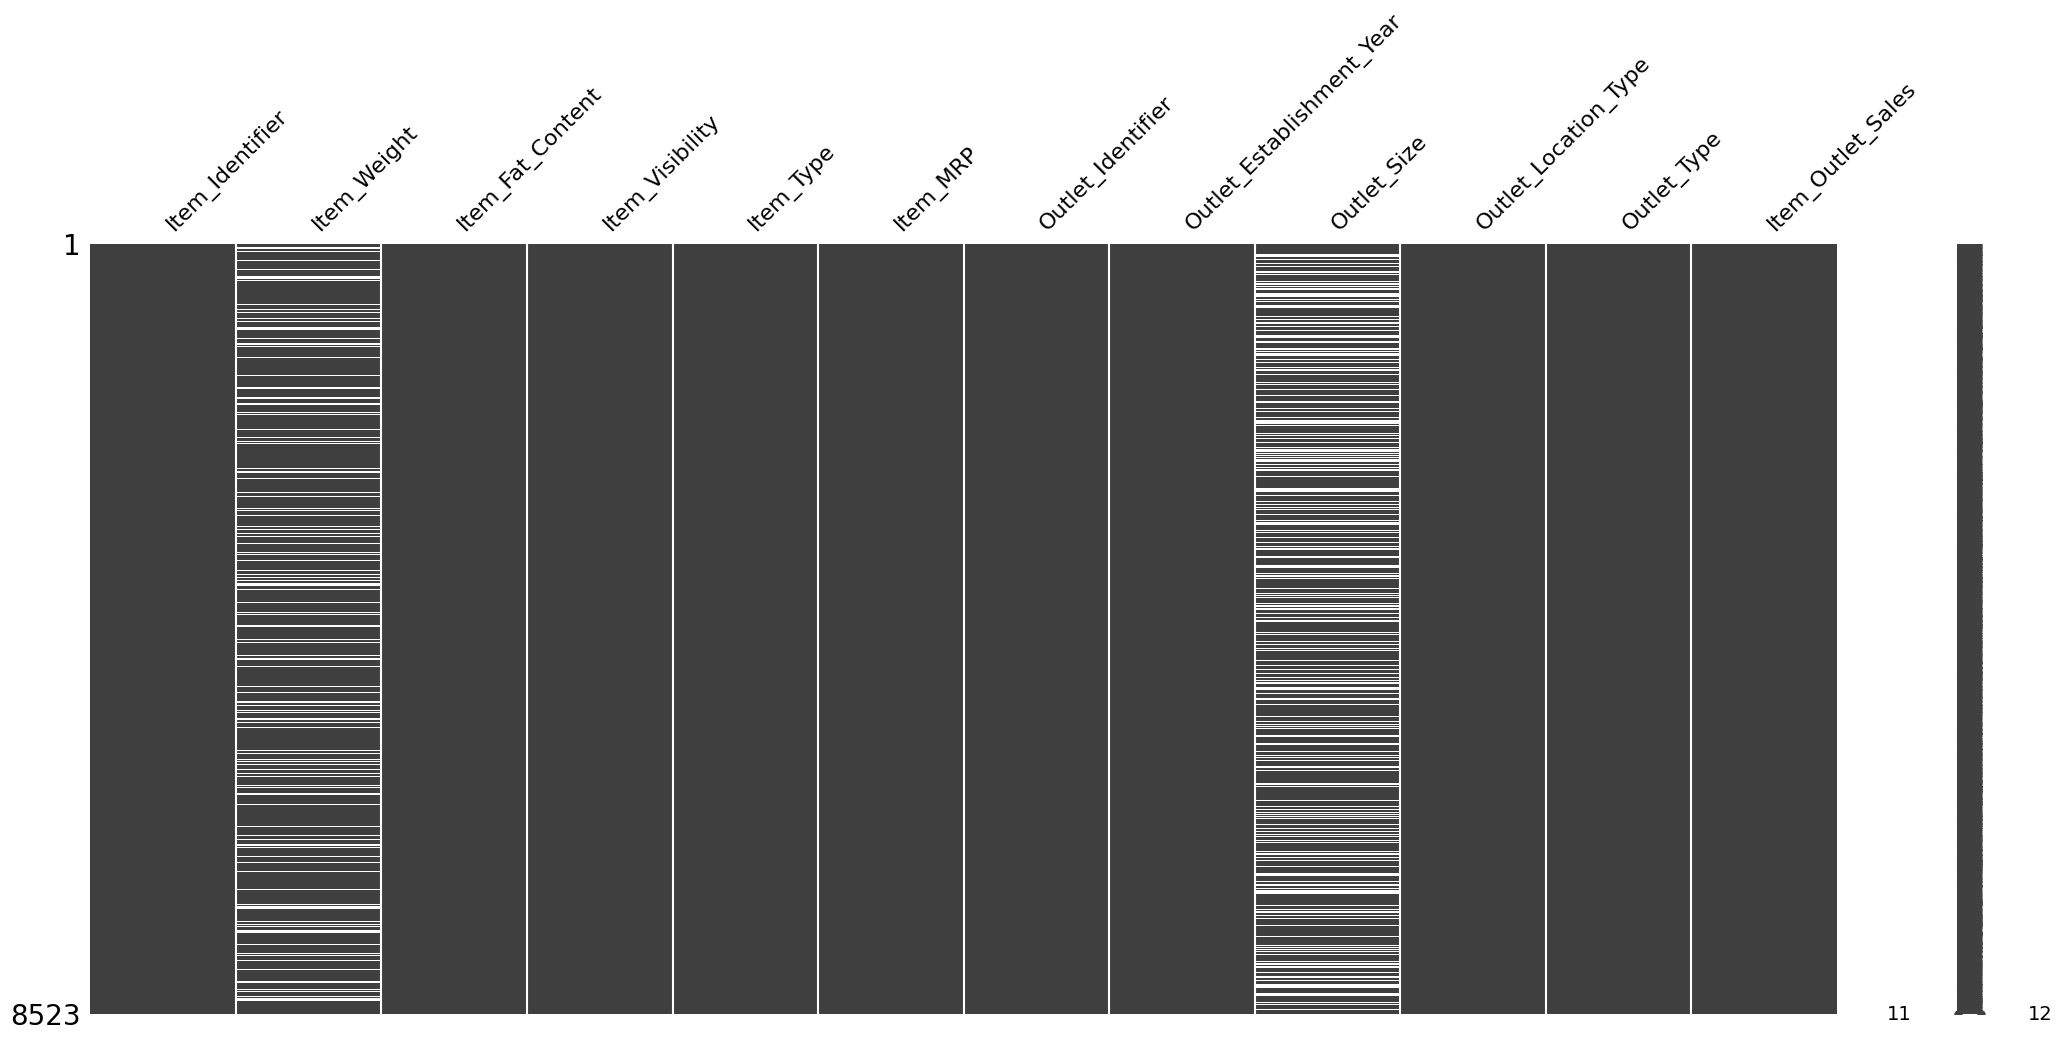

In [12]:
msno.matrix(df);

In [13]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [15]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
df[num_cols] = df[num_cols].fillna('-1')
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

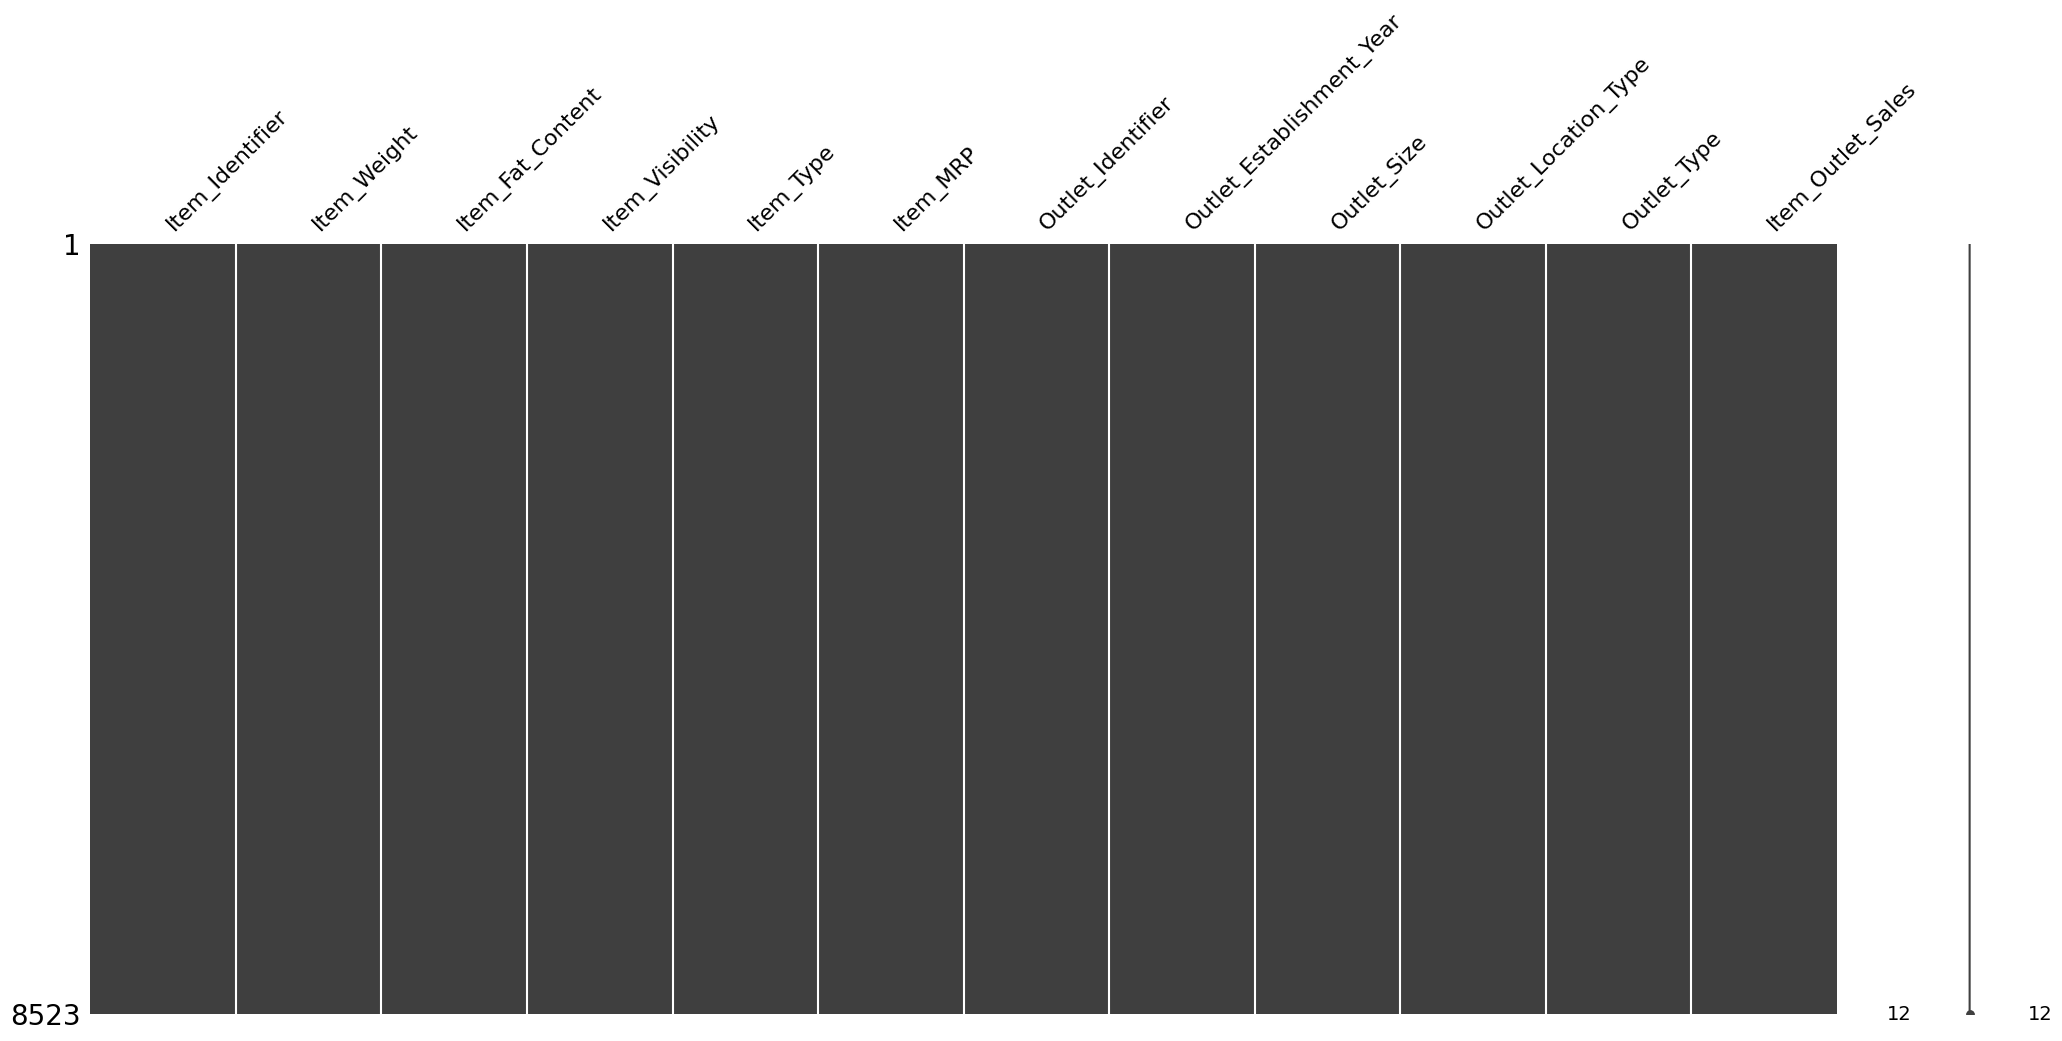

In [18]:
msno.matrix(df);

In [19]:
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [20]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Weight
-1       1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others       

In [21]:
numum = df.select_dtypes('number').columns
numum

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [22]:
df[numum].mean()

Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [23]:
df['Item_Visibility'].min()

0.0

In [24]:
df['Item_Visibility'].max()

0.328390948

In [25]:
df['Item_MRP'].min()

31.29

In [26]:
df['Item_MRP'].max()

266.8884

In [27]:
df['Outlet_Establishment_Year'].min()

1985

In [28]:
df['Outlet_Establishment_Year'].max()

2009

In [29]:
df['Item_Outlet_Sales'].min()

33.29

In [30]:
df['Item_Outlet_Sales'].max()

13086.9648

## Exploratory Data Analysis

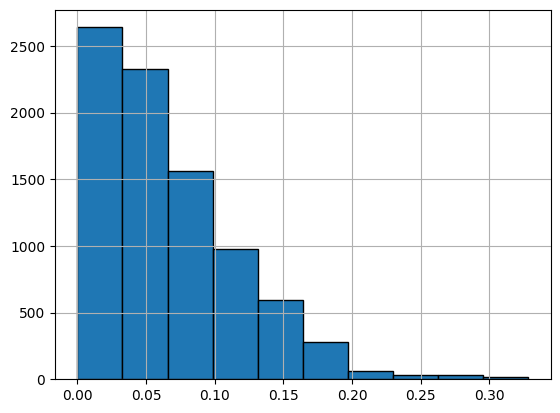

In [37]:
ax = df['Item_Visibility'].hist(edgecolor = 'black')

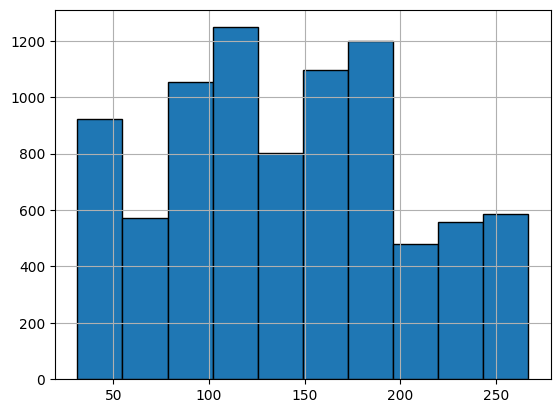

In [38]:
ax = df['Item_MRP'].hist(edgecolor = 'black')

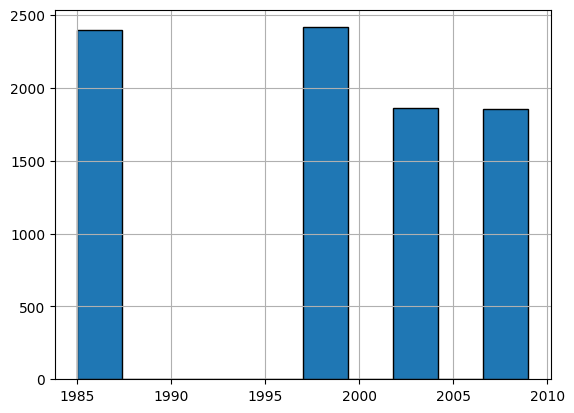

In [39]:
ax = df['Outlet_Establishment_Year'].hist(edgecolor = 'black')

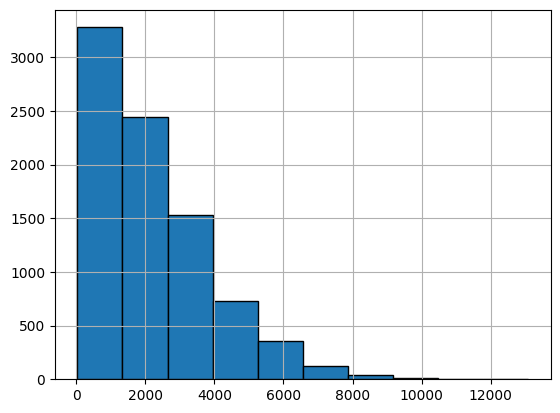

In [40]:
ax = df['Item_Outlet_Sales'].hist(edgecolor = 'black')

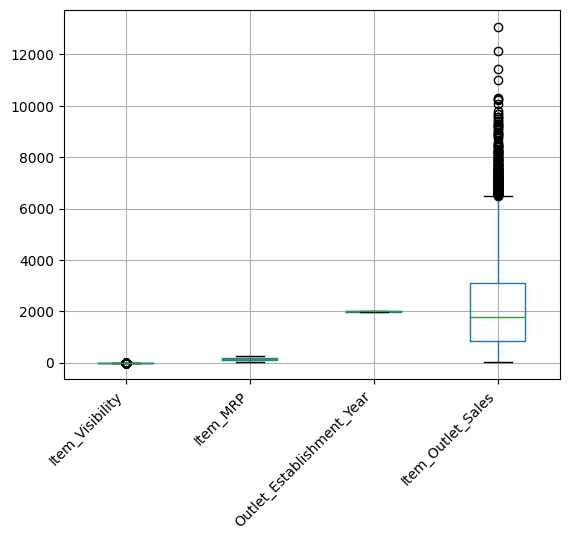

In [41]:
ax = df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

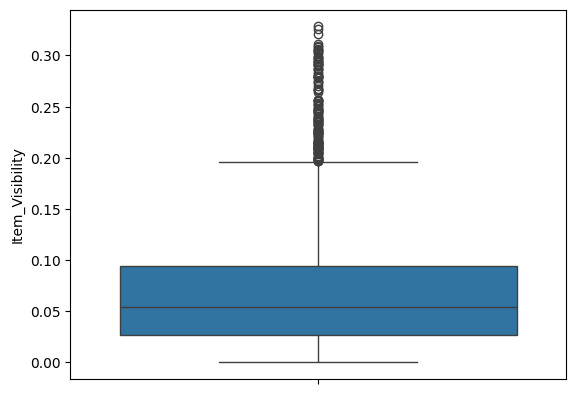

In [42]:
ax = sns.boxplot(data=df, y="Item_Visibility")

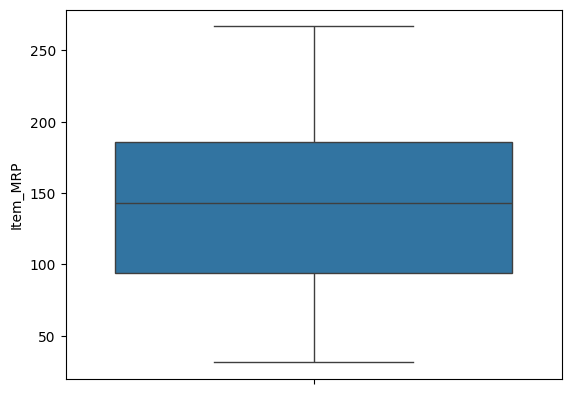

In [43]:
ax = sns.boxplot(data=df, y="Item_MRP")

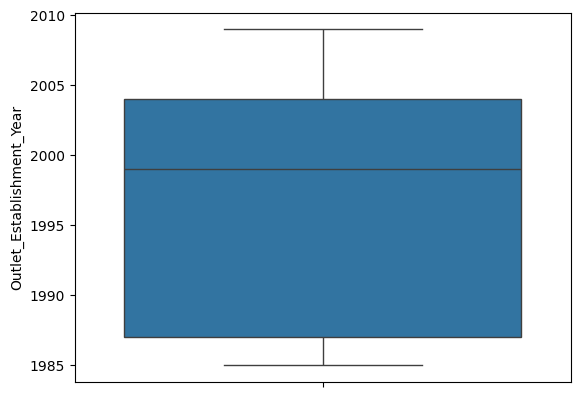

In [45]:
ax = sns.boxplot(data=df, y="Outlet_Establishment_Year")

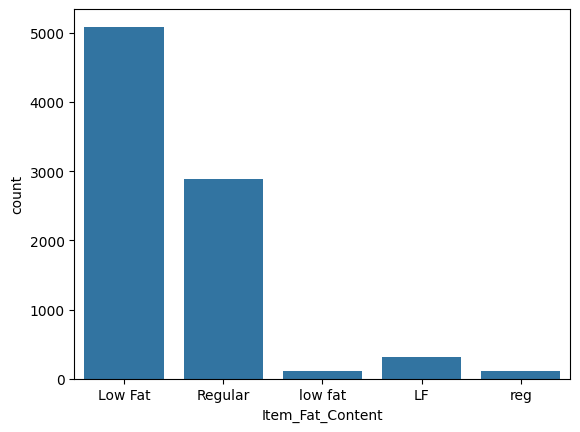

In [50]:
ax = sns.countplot(data=df, x='Item_Fat_Content')

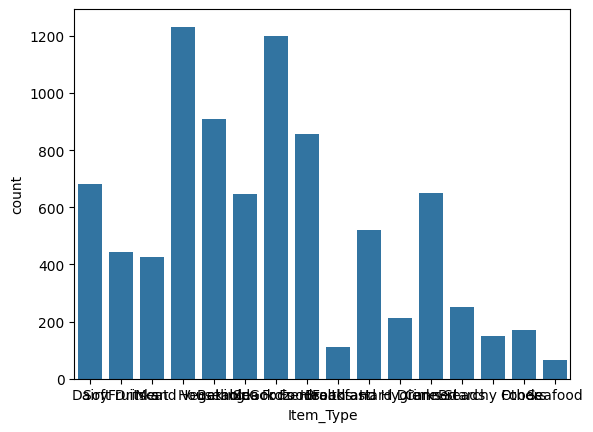

In [51]:
ax = sns.countplot(data=df, x='Item_Type')

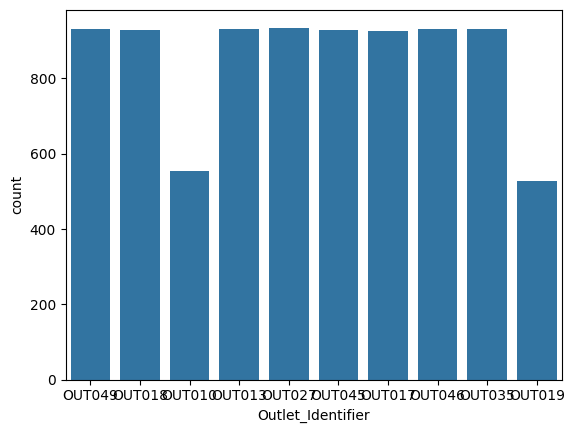

In [53]:
ax = sns.countplot(data=df, x='Outlet_Identifier')

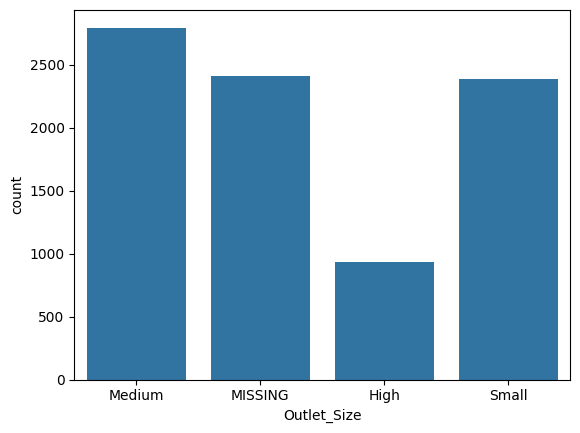

In [55]:
ax = sns.countplot(data=df, x='Outlet_Size')

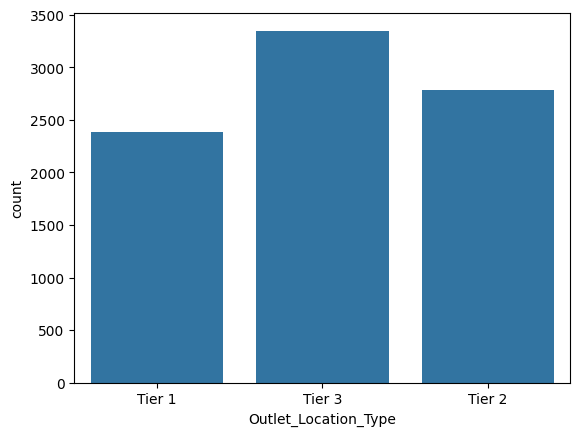

In [56]:
ax = sns.countplot(data=df, x='Outlet_Location_Type')

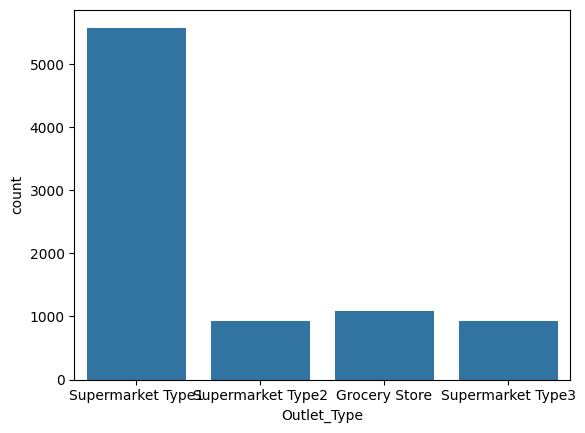

In [57]:
ax = sns.countplot(data=df, x='Outlet_Type')

In [31]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


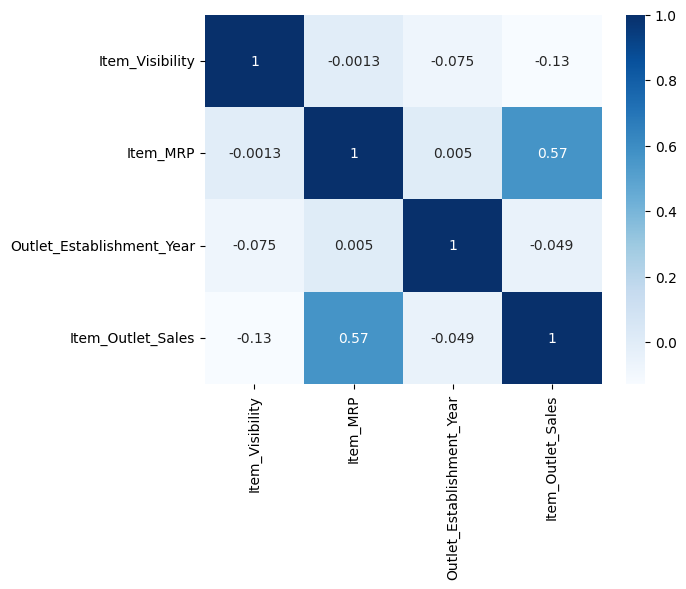

In [32]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

## Feature Inspection